# Code for scraping 
Need not run this code if the scraping is done already

Install Selenium and Chromium driver for scraping the data

In [ ]:
%%capture
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Import the necessary libraries

In [ ]:
import threading
import json
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
import sys

Rendering the web page content

In [ ]:
def rendering(driver, url, index=None, result=None):  
  driver.get(url)                                          # load the web page from the URL
  time.sleep(3)                                            # wait for the web page to load
  render = driver.page_source                              # get the page source HTML
  if index != None:
        result[index] = render
        return

  return render

Open Chromium and parse the rendered html content

In [ ]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
#chrome_options = webdriver.chrome.options.Options()
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

#each url corresponds to different years
urls = ['https://ieeexplore.ieee.org/xpl/tocresult.jsp?isnumber=9668973&punumber=6287639','https://ieeexplore.ieee.org/xpl/tocresult.jsp?isnumber=9312710&punumber=6287639','https://ieeexplore.ieee.org/xpl/tocresult.jsp?isnumber=8948470&punumber=6287639','https://ieeexplore.ieee.org/xpl/tocresult.jsp?isnumber=8600701&punumber=6287639']


#only the title, link, year of publication, authors and citations are scraped
data = [None]*4
data[0] = pd.DataFrame(columns=['title','link','year','authors','citations'])
data[1] = pd.DataFrame(columns=['title','link','year','authors','citations'])
data[2] = pd.DataFrame(columns=['title','link','year','authors','citations'])
data[3] = pd.DataFrame(columns=['title','link','year','authors','citations'])

def extract(url, ind):
  counter = 0
  #driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
  driver = webdriver.Chrome('chromedriver',options=chrome_options)
  driver.get(url)
  time.sleep(5)
  while True:
    render = driver.page_source

    soup = BeautifulSoup(render, 'html.parser')
    soup = soup.find_all('div', attrs={'class': 'col result-item-align'})

    for i in soup:
      # put somelimit varriable here for less time
      try:
        d = dict()
        title = i.find('h2').find('a', href=True)
        d['title'] = title.text.strip()
        d['link'] = title['href']

        authors = i.find('p', attrs={'class': 'author text-base-md-lh'}).find_all('span', attrs={'class': 'text-base-md-lh'})
        author_list = []
        for author in authors:
          author_list.append(author.find('a').find('span').text.strip())
        d['authors'] = author_list

        description = i.find('div', attrs={'class': 'description text-base-md-lh'}).find_all('div')
        d['year'] = int(description[0].find('span').text.strip().split(' ')[2])
      except:
        continue

      try:
        d['citations'] = int(description[1].find('span').find('a').text.strip().split(' ')[1][1:-1])
      except IndexError:
        d['citations'] = 0

      data[ind] = data[ind].append(d, ignore_index=True)
      counter += 1
      if counter >= 3:
        break
    print(ind, end=' ')
    print(counter)

    if counter >= 500:
    #if counter >= 3:
      break
    
    try:
      l = driver.find_element("link text",">")
      driver.execute_script("arguments[0].click();", l)
      time.sleep(5)
    except NoSuchElementException:
      break
  driver.quit()



Using Threads to parallely scrape the data

In [ ]:
#using 4 threads where each thread scraps data from four different years
threads = [None]*4
threads[0] = threading.Thread(target=extract, args=(urls[0], 0))
threads[0].start()
threads[1] = threading.Thread(target=extract, args=(urls[1], 1))
threads[1].start()
threads[2] = threading.Thread(target=extract, args=(urls[2], 2))
threads[2].start()
threads[3] = threading.Thread(target=extract, args=(urls[3], 3))
threads[3].start()
for i in range(4):
  threads[i].join()

2 3
1 3
3 3
0 3
2 4
1 4
3 4
0 4
2 5
1 5
3 5
0 5
2 6
1 6
3 6
0 6
2 7
1 7
3 7
0 7
2 8
1 8
3 8
0 8
1 9
2 9
3 9
0 9
1 10
2 10
3 10
0 10
1 11
2 11
3 11
0 11
1 12
2 12
3 12
0 12
1 13
2 13
3 13
0 13
1 14
2 14
3 14
0 14
1 15
23  15
15
0 15
1 16
3 16
2 16
1 17
0 16
3 17
2 17
0 17
1 18
3 18
2 18
1 19
0 18
3 19
2 19
1 20
0 19
3 20
2 20
0 20
1 21
3 21
2 21
0 21
1 22
3 22
2 22
1 23
0 22
3 23
2 23
1 24
0 23
3 24
2 24
0 24
1 25
3 25
2 25
0 25
1 26
3 26
2 26
01 26
 27
3 27
2 27
0 27
1 28
3 28
2 28
1 29
0 28
3 29
2 29
1 30
0 29
3 30
2 30
1 31
0 30
3 31
2 31
0 31
1 32
3 32
2 32
1 33
0 32
3 33
2 33
0 33
1 34
3 34
2 34
0 34
1 35
3 35
2 35
0 35
1 36
3 36
2 36
0 36
1 37
3 37
2 37
0 37
1 38
3 38
2 38
0 38
1 39
2 39
3 39
0 39
1 40
2 40
3 40
0 40
1 41
2 41
3 41
0 41
1 42
3 42
2 42
1 43
0 42
3 43
2 43
0 43
1 44
3 44
2 44
0 44
1 45
32 45
 45
0 45
1 46
2 46
3 46
0 46
1 47
3 47
2 47
0 47
1 48
3 48
2 48
0 48
1 49
3 49
0 49
2 49
1 50
0 50
3 50
2 50
1 51
0 51
3 51
2 51
1 52
0 52
3 52
2 52
1 53
0 53
3 53
2 53
1 54
0 5

In [ ]:
df = pd.concat([data[i] for i in range(4)])

In [ ]:
df = df.reset_index()

In [ ]:
df.to_csv('data.csv')

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df = df.drop(['index'], axis=1)

In [ ]:
dff = pd.read_csv('data.csv')

Scrape the abstract using the research paper link scraped previously

In [ ]:
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

abstract = []
for i in range(300): #was 21
  driver = webdriver.Chrome('chromedriver',options=chrome_options)
  url = "https://ieeexplore.ieee.org" + dff.iloc[i]['link'] #added
  driver.get(url)
  time.sleep(1) #was 3
  render = driver.page_source
  driver.quit()
  soup = BeautifulSoup(render, 'html.parser')
  try:
    txt = soup.find_all('div', attrs={'class': 'u-mb-1'})[1].find('div').text.strip()
    abstract.append(txt)
  except:
    abstract.append('')
  #print(i)


In [ ]:
abstract = pd.Series(abstract)

In [ ]:
#abstract
abstract.to_csv('abstract.csv')
dff['abstract'] = abstract

In [ ]:
#data = [d.iloc[:60] for d in data] #was 600

In [ ]:
abstract2 = pd.read_csv('abstract.csv')

In [ ]:
df = pd.DataFrame(abstract.append(abstract2['0'], 
                  ignore_index = True))
df.shape
print(df)

                                                     0
0    Due to the life expectancy increase, there wil...
1    Fine jewelry is a unique class of ornaments co...
2    In this paper, an adaptable fuzzy control mech...
3    Unique identification of goods and products is...
4    This paper is concerned with the finite-time \...
..                                                 ...
595  The number of road accidents has constantly be...
596  Sparse Random Linear Network Coding (RLNC) red...
597  More than a quarter of all Americans are estim...
598                                                NaN
599  Face image captured under uncontrolled illumin...

[600 rows x 1 columns]


In [ ]:
dff
#dff['abstract'] = abstract #df[0]

,Unnamed: 0,index,title,link,year,authors,citations,abstract
0,0,0,Complex Human Activity Recognition Using a Loc...,/document/9899447/,2022,['Tunç Aşuroğlu'],0,"Due to the life expectancy increase, there wil..."
1,1,1,NFT Certificates and Proof of Delivery for Fin...,/document/9899445/,2022,"['Noura Alnuaimi', 'Alanoud Almemari', 'Mohamm...",0,Fine jewelry is a unique class of ornaments co...
2,2,2,An AI-in-Loop Fuzzy-Control Technique for UAV’...,/document/9899416/,2022,"['Mohammed Rabah', 'Hashem Haghbayan', 'Eero I...",0,"In this paper, an adaptable fuzzy control mech..."
3,3,3,Time–Domain Electromagnetic Identification Bas...,/document/9895421/,2022,['Petr Kadlec'],0,Unique identification of goods and products is...
4,4,4,Finite-Time H∞ Robust Controller Design for a ...,/document/9895395/,2022,"['Junjie Zhao', 'Bo Li']",0,This paper is concerned with the finite-time \...
...,...,...,...,...,...,...,...,...
1422,1422,495,Design and Fabrication of a Custom-Dielectric ...,/document/8712458/,2019,"['James M. Monkevich', 'Gregory Peter Le Sage']",19,NaN
1423,1423,496,Design and Fabrication of a Custom-Dielectric ...,/document/8712458/,2019,"['James M. Monkevich', 'Gregory Peter Le Sage']",19,NaN
1424,1424,497,Design and Fabrication of a Custom-Dielectric ...,/document/8712458/,2019,"['James M. Monkevich', 'Gregory Peter Le Sage']",19,NaN
1425,1425,498,Design and Fabrication of a Custom-Dielectric ...,/document/8712458/,2019,"['James M. Monkevich', 'Gregory Peter Le Sage']",19,NaN


# Preprocessing

upload json and database.csv here

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook
import pandas as pd
import time
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
database = pd.read_csv('database.csv')
database = database.drop(['Unnamed: 0'], axis=1)
data = database.copy()

Normalize the text by converting to lower case, by removing punctuation, by lematization

In [3]:
def process_string(text):
  try:
    text = text.lower() #to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) #strip punctuation
    text = stop_lemmatize(text)
    return text
  except:
    return ''

In [4]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [5]:
stop = stopwords.words('english')
lem = WordNetLemmatizer()

def stop_lemmatize(doc):

    tokens = nltk.word_tokenize(doc)
    tmp = ""
    for w in tokens:
        if w not in stop:
            tmp += lem.lemmatize(w, get_wordnet_pos(w)) + " "
    return tmp

In [6]:
def transform_df(df):
  df['title'] = df['title'].apply(process_string)
  df['abstract'] = df['abstract'].apply(process_string)
  return df

Creating Index also called as Posting List

In [7]:
def index_it(entry, index):
  words = entry['title'].split()
  words.extend(entry['abstract'].split())
  ID = entry.Id
  for word in words:
    if word in index.keys():
      if ID not in index[word]:
        index[word].append(ID)
    else:
      index[word] = [ID]
  return index

In [8]:
def index_all(df, index):
  for i in range(len(df)):
    entry = df.loc[i,:]
    index = index_it(entry = entry, index = index)
  return index

In [9]:
def build_index(df, index):
    to_add = transform_df(df)
    #print(to_add['abstract'])
    index = index_all(df = to_add, index = index)
    return index

In [10]:
print(build_index(df = data, index = {}))

{'bargaining': [0, 417], 'game': [0, 99, 239, 245, 340], 'base': [0, 2, 6, 7, 9, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27, 29, 32, 35, 36, 39, 40, 44, 46, 47, 48, 49, 53, 54, 55, 62, 63, 64, 65, 67, 70, 71, 72, 73, 74, 76, 77, 78, 81, 83, 85, 86, 90, 91, 93, 94, 96, 98, 99, 102, 104, 106, 111, 112, 113, 114, 115, 116, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 132, 133, 134, 135, 138, 140, 146, 147, 148, 149, 150, 152, 154, 156, 157, 163, 168, 170, 174, 175, 176, 181, 183, 185, 186, 187, 188, 190, 192, 193, 194, 195, 197, 200, 201, 202, 203, 205, 206, 207, 209, 210, 212, 214, 216, 218, 219, 220, 221, 225, 226, 230, 231, 234, 240, 241, 242, 246, 249, 250, 254, 255, 256, 259, 262, 263, 267, 270, 272, 277, 278, 281, 282, 292, 293, 294, 295, 297, 298, 299, 308, 310, 311, 312, 317, 318, 319, 320, 322, 326, 327, 328, 330, 333, 335, 337, 339, 340, 341, 342, 343, 347, 348, 350, 351, 353, 356, 357, 358, 359, 360, 361, 362, 363, 365, 367, 368, 373, 375, 376, 377, 378, 379, 381, 382,

In [11]:
data.columns

Index(['Id', 'title', 'link', 'year', 'authors', 'citations', 'abstract'], dtype='object')

Posting List Created

In [12]:
#import numpy as np
#from google.colab import files

In [13]:
#dff.drop(['Unnamed: 0'],inplace=True,axis=1)
#dff.rename(columns={'index':'Id'},inplace=True)

In [14]:
#dff['abstract'] = abstract
#dff.to_csv('finaldb.csv')
#files.download('finaldb.csv') 

In [15]:
#idx = build_index(df = dff, index = {})

In [16]:
"""np.save('idx_keys', np.array(list(idx.keys())))
np.save('idx_values',np.array(list(idx.values())))
files.download('idx_keys.npy')
files.download('idx_values.npy') """

"np.save('idx_keys', np.array(list(idx.keys())))\nnp.save('idx_values',np.array(list(idx.values())))\nfiles.download('idx_keys.npy')\nfiles.download('idx_values.npy') "

Preprocessed documents

In [17]:
#print(dff)

In [18]:
#a = np.load('idx_keys.npy')

#Boolean Model

In [19]:
import nltk
import time
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer 
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, tqdm_notebook
import pandas as pd
import numpy as np 
import json

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
with open('index.json', 'r') as f:
    idx = json.load(f)

In [ ]:
"""database = pd.read_csv('finaldb.csv')
database = database.drop(['Unnamed: 0'], axis=1)
data = database.copy()


idx_keys = np.load('idx_keys.npy',allow_pickle=True)
idx_values = np.load('idx_values.npy',allow_pickle=True)
idx = {}
for A, B in zip(idx_keys, idx_values):
    idx[A] = B
    
print(idx)"""

{'complex': [0, 12, 17, 19, 23, 31, 32, 57, 66, 69, 75, 81, 84, 87, 98, 105, 115, 118, 127, 135, 154, 181, 200, 214, 237, 248, 267, 287, 2, 21, 140, 162, 217, 112, 268], 'human': [0, 8, 13, 22, 36, 66, 70, 78, 94, 104, 106, 108, 123, 132, 133, 158, 159, 160, 164, 180, 185, 203, 215, 231, 7, 18, 121, 312, 347, 32, 61], 'activity': [0, 8, 12, 18, 38, 69, 108, 121, 122, 133, 134, 195, 228, 273, 3, 53, 218, 220, 356, 371, 47], 'recognition': [0, 8, 9, 24, 57, 63, 87, 105, 106, 108, 122, 171, 237, 252, 277, 7, 26, 94, 132, 204, 220, 296, 356, 372, 377, 382, 18, 110, 32, 72, 75, 125, 156, 226, 270, 294], 'use': [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 28, 29, 30, 34, 35, 37, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 68, 69, 70, 71, 72, 74, 77, 79, 80, 82, 83, 84, 88, 91, 92, 93, 95, 96, 97, 98, 99, 101, 103, 105, 106, 107, 108, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 126, 127, 128, 129, 131, 1

In [21]:
def process_string(text):
  try:
    text = text.lower() #to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)) #strip punctuation
    text = stop_lemmatize(text)
    return text
  except:
    return ''

Split the query into list of terms

In [22]:
def process_query(query):
    norm = process_string(query)
    return norm.split()


Performing Boolean AND by SET Intersection operation

In [23]:
def lists_intersection(lists):
    intersect = list(set.intersection(*map(set, lists)))
    intersect.sort()
    return intersect

Get the details of retrieved document Id's

In [24]:
def connect_id_df(retrieved_id, df):
    return df[df.Id.isin(retrieved_id)].reset_index(drop=True)

Search for the posting list of terms present in the query

In [25]:
def search_postlist(query, index=idx):
    query_split = process_query(query)
    retrieved = []
    for word in query_split:
        if word in index.keys():
            retrieved.append(index[word])
    if len(retrieved) > 0:
        result = lists_intersection(retrieved)
    else:
        result = [0]
    print(result)
    result = connect_id_df(result, database)
    return result

In [26]:
def search(query):
    start = time.time()
    result = search_postlist(query)
    print("results:")
    for i in range(len(result)):
      print(result.iloc[i].Id, end="  ")
      print(result.iloc[i].title)


In [27]:
def search_doc():
    query = str(input("Search for: "))
    search(query=query)

In [28]:
search_doc()

Search for: machine
[12, 16, 34, 39, 44, 47, 48, 50, 82, 92, 104, 107, 110, 114, 116, 124, 140, 143, 149, 155, 158, 161, 163, 164, 189, 196, 200, 226, 231, 256, 267, 270, 286, 301, 336, 339, 344, 359, 364, 368, 370, 371, 373, 387, 412, 413, 416, 419, 422, 426, 440, 446, 450, 466, 471, 474, 476, 477, 478, 538, 543, 544, 562, 564, 569, 575, 585]
results:
12  Advances in Adversarial Attacks and Defenses in Computer Vision: A Survey
16  Toward Performing Image Classification and Object Detection With Convolutional Neural Networks in Autonomous Driving Systems: A Survey
34  Sentiment Analysis of Customers’ Reviews Using a Hybrid Evolutionary SVM-Based Approach in an Imbalanced Data Distribution
39  The Effect of Fake Reviews on e-Commerce During and After Covid-19 Pandemic: SKL-Based Fake Reviews Detection
44  Neural Network Approach to Program Synthesis for Tabular Transformation by Example
47  Towards Knowledge Enhanced Language Model for Machine Reading Comprehension
48  A Hybrid Schedul

#Vector Space Model

In [29]:
vectorspace_dataset = [data.loc[i].title + data.loc[i].abstract for i in range(len(data))]

In [30]:
vectorspace_dataset

['bargaining game base time schedule scheme ambient backscatter communication backscatter communication acknowledge essential key technology internet thing iot application consider fact need coordination network agent cooperative bargaining theory effective method strike appropriate system performance paper investigate time schedule algorithm backscatteraided radiofrequency rf power cognitive radio cr network multiple secondary transmitter switch among backscatter energy harvest active data transmission mode objective maximize rfcr system performance explore mutual benefit leverage reciprocal consensus different control issue accord idea two different bargaining solution modify nash bargaining solution equitable nash bargaining solution design new dual bargaining game model effectively share limited time resource main novelty propose approach adaptability flexibility responsiveness current rfcr system condition last numerical simulation carry evaluate performance propose scheme demonst

Calculate the tf-idf weights

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
docs_tfidf = vectorizer.fit_transform(vectorspace_dataset)

def get_tf_idf_query_similarity(vectorizer, docs_tfidf, query):
    """
    vectorizer: TfIdfVectorizer model
    docs_tfidf: tfidf vectors for all docs
    query: query doc

    return: cosine similarity between query and all docs
    """
    query_tfidf = vectorizer.transform([process_string(query)])
    cosineSimilarities = cosine_similarity(query_tfidf, docs_tfidf).flatten()
    return cosineSimilarities

In [32]:
#cosine similarity of all the documents with respect to the query
ans = get_tf_idf_query_similarity(vectorizer, docs_tfidf, "machine learning")

In [33]:
ans

array([0.        , 0.02120884, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.16946855, 0.02612376, 0.11917619,
       0.        , 0.03296123, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02049024, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.11791469, 0.12415385, 0.        , 0.        , 0.0951066 ,
       0.        , 0.        , 0.        , 0.        , 0.08664348,
       0.        , 0.        , 0.        , 0.01756729, 0.03389842,
       0.04326106, 0.        , 0.06757853, 0.15162777, 0.        ,
       0.27340461, 0.        , 0.03552893, 0.        , 0.        ,
       0.        , 0.        , 0.01515727, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02841277, 0.        , 0.04408382, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01242

In [34]:
max_citations = max(data.citations)
max_year = max(data.year)

Calculate final relevance score based on the Cosine Similarity, Published year and the Number of Citations.

a denotes weightage or importance to be given to the year of publication.

b denotes weightage or importance to be given to the number of citations.

c denotes weightage or importance to be given to the cosine similarity.

In [35]:
a = 0.15
b = 0.15
c = 0.7
#note that a+b+c must be equal to 1

Computing the final scores of documents. Here Year and Citations are normalized.

In [36]:
score = [a*(data.loc[i].year/max_year) + b*(data.loc[i].citations/max_citations) + c*(ans[i]) for i in range(len(data))]
score=list(enumerate(score))

In [37]:
score.sort(key=lambda x:x[1],reverse=True)

In [38]:
k = 10 #Number of documents to be retireved
score = score[:k]

Results

In [39]:
for i in score:
  print(database.iloc[i[0]].Id, end="  ")
  print(database.iloc[i[0]].title)

107  Machine Learning and Deep Learning Approaches for CyberSecurity: A Review
426  Permanent Magnet Vernier Machines for Direct-Drive Offshore Wind Power: Benefits and Challenges
50  Transverse Flux Machine—A Review
446  Clustering and Classification for Time Series Data in Visual Analytics: A Survey
371  Subjective Answers Evaluation Using Machine Learning and Natural Language Processing
560  Security and Privacy for the Internet of Medical Things Enabled Healthcare Systems: A Survey
19  Vehicle-to-Grid Aggregator to Support Power Grid and Reduce Electric Vehicle Charging Cost
226  LinRegDroid: Detection of Android Malware Using Multiple Linear Regression Models-Based Classifiers
433  Analysis of Data Management in Blockchain-Based Systems: From Architecture to Governance
538  Mobile Apps Meet the Smart Energy Grid: A Survey on Consumer Engagement and Machine Learning Applications


#Latent Semantic Analysis and Clustering

Using LSA, a low-rank approximation of the original matrix can be created (with some loss of information although!) that can be used for our clustering purpose.

In [40]:
#Here documents are reduced to dimension of 200
tsvd = TruncatedSVD(n_components=200)
tsvd.fit(docs_tfidf)
tsvd_mat = tsvd.transform(docs_tfidf)

100%|██████████| 19/19 [00:53<00:00,  2.79s/it]


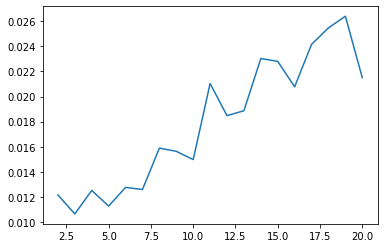

In [41]:
s_list = []
for clus in tqdm(range(2,21)):

    km = KMeans(n_clusters=clus, n_init=50, max_iter=1000) # Instantiate KMeans clustering

    km.fit(tsvd_mat) # Run KMeans clustering

    s = silhouette_score(tsvd_mat, km.labels_)

    s_list.append(s)
plt.plot(range(2,21), s_list)

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


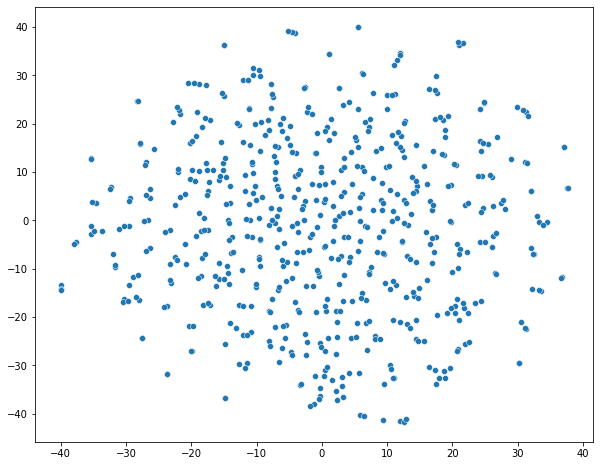

In [42]:
tsne = TSNE(n_components=2)
tsne_mat = tsne.fit_transform(tsvd_mat)
plt.figure(figsize=(10,8))
sns.scatterplot(tsne_mat[:,0],tsne_mat[:,1])

In [43]:
from sklearn.metrics import pairwise_distances
import numpy as np
query = "game theory"
query_mat = tsvd.transform(vectorizer.transform([process_string(query)]))
dist = pairwise_distances(X=tsvd_mat, Y=query_mat, metric='euclidean')
database.loc[np.argmin(dist.flatten())]

Id                                                         245
title        Development of Serious Games for Teaching Info...
link                                        /document/8911357/
year                                                      2019
authors             ['Mahmoud Mostafa', 'Osama S. Faragallah']
citations                                                    5
abstract     Serious games have been used effectively in ma...
Name: 245, dtype: object